# 🔋 EV Home-Charging Cost & Consumption Analysis

Welcome to this data science project focused on analyzing and forecasting **electric vehicle (EV) home charging behavior**.

### 📌 Objectives:
- Analyze historical EV charging sessions from real-world data.
- Understand user behavior: when, how long, and how much energy they charge.
- Predict **monthly energy usage** and **electricity cost** using Facebook Prophet.
- Calculate accuracy metrics (MAE, RMSE) to validate forecast quality.

---

### 🛠️ Technologies Used:
- Python (Pandas, Matplotlib, Prophet)
- Time Series Forecasting (Facebook Prophet)
- Google Colab for execution & visualizations

---

### 📊 Final Outcome:
- RMSE: **91.27 kWh** in monthly forecast
- Predicted monthly charging cost: ₹785.16
- Visual comparison of actual vs predicted energy usage


In [11]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

# Loading the dataset
df = pd.read_csv("Dataset1_charging_reports.csv")
df.head()

Saving Dataset1_charging_reports.csv to Dataset1_charging_reports.csv


,,"location;""user_id"";""session_id"";""plugin_time"";""plugout_time"";""connection_time"";""energy_session"""
"ASK;""ASK_Plass15"";""ASK_18266"";2019-11-28 19:08:00;2019-11-29 08:20:00;13",2;19,96.0
"ASK;""ASK_Plass15"";""ASK_14220"";2019-09-02 20:23:00;2019-09-03 07:48:00;11",41667;21,34.0
"ASK;""ASK_Plass15"";""ASK_20447"";2020-01-08 17:35:00;2020-01-09 07:49:00;14",23333;19,85.0
"ASK;""ASK_Plass15"";""ASK_13858"";2019-08-23 18:10:00;2019-08-24 09:22:00;15",2;24,5.0
"ASK;""ASK_Plass15"";""ASK_16687"";2019-10-30 20:14:00;2019-10-31 08:10:00;11",93333;18,5.0


**DATA CLEANING**

In [48]:
#DATA CLEANING!!

# Remove leading/trailing spaces and quotes from column names
df.columns = df.columns.str.strip().str.replace('"', '')

print(df.columns.tolist())



['location', 'user_id', 'session_id', 'plugin_time', 'plugout_time', 'connection_time', 'energy_session', 'duration_hours', 'cost_session', 'date', 'hour', 'weekday', 'month', 'year_month']


In [18]:
print(df.columns.tolist())

['location', 'user_id', 'session_id', 'plugin_time', 'plugout_time', 'connection_time', 'energy_session']


**DATA** **ANALYSIS**

In [19]:
df['plugin_time'] = pd.to_datetime(df['plugin_time'])
df['plugout_time'] = pd.to_datetime(df['plugout_time'])


In [22]:
df['duration_hours'] = (df['plugout_time'] - df['plugin_time']).dt.total_seconds() / 3600


In [24]:
cost_per_kWh = 6
df['cost_session'] = df['energy_session'] * cost_per_kWh


In [25]:
df['date'] = df['plugin_time'].dt.date
df['hour'] = df['plugin_time'].dt.hour
df['weekday'] = df['plugin_time'].dt.day_name()
df['month'] = df['plugin_time'].dt.month


In [26]:
energy_by_user = df.groupby('user_id')['energy_session'].sum().sort_values(ascending=False)
print(energy_by_user.head())


user_id
OSL_S_KT43      9,878,9216,04413,917,829,569,046,6310,687,0312...
OSL_T_68        9,778,2215,796,6317,399,8710,8217,766,6718,916...
TRO_R_AdO3-1    9,68,853,734,075,849,068,743,8643,626,828,686,...
OSL_T_48        9,6628,3435,928,242,9626,8538,9936,240,9931,22...
OSL_T_46        9,559,597,748,318,8812,5115,0710,378,7811,718,...
Name: energy_session, dtype: object


**DATA** **VISUALISATION**

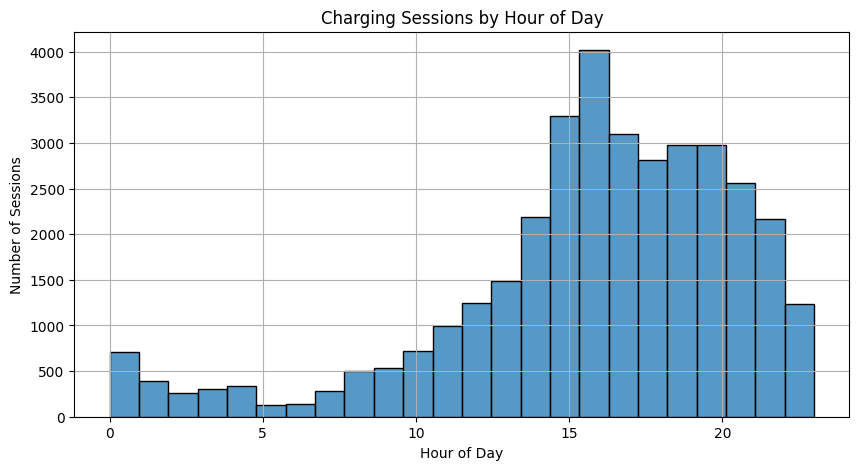

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['hour'], bins=24, kde=False)
plt.title('Charging Sessions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sessions')
plt.grid(True)
plt.show()


In [29]:
summary = df.groupby('user_id').agg(
    total_energy_kWh=('energy_session', 'sum'),
    avg_session_duration_hr=('duration_hours', 'mean'),
    total_sessions=('session_id', 'count'),
    total_cost=('cost_session', 'sum')
).sort_values(by='total_energy_kWh', ascending=False)

summary.reset_index(inplace=True)
summary.head()


,user_id,total_energy_kWh,avg_session_duration_hr,total_sessions,total_cost
0,OSL_S_KT43,"9,878,9216,04413,917,829,569,046,6310,687,0312...",13.304327,416,"9,879,879,879,879,879,878,928,928,928,928,928,..."
1,OSL_T_68,"9,778,2215,796,6317,399,8710,8217,766,6718,916...",16.779060,39,"9,779,779,779,779,779,778,228,228,228,228,228,..."
2,TRO_R_AdO3-1,"9,68,853,734,075,849,068,743,8643,626,828,686,...",10.369387,29,"9,69,69,69,69,69,68,858,858,858,858,858,853,73..."
3,OSL_T_48,"9,6628,3435,928,242,9626,8538,9936,240,9931,22...",4.058974,13,"9,669,669,669,669,669,6628,3428,3428,3428,3428..."
4,OSL_T_46,"9,559,597,748,318,8812,5115,0710,378,7811,718,...",8.841667,38,"9,559,559,559,559,559,559,599,599,599,599,599,..."


In [32]:
df['hour'] = df['plugin_time'].dt.hour


In [33]:
df['energy_session'] = pd.to_numeric(df['energy_session'], errors='coerce')


In [34]:
df = df.dropna(subset=['energy_session'])
df = df[df['energy_session'] > 0]


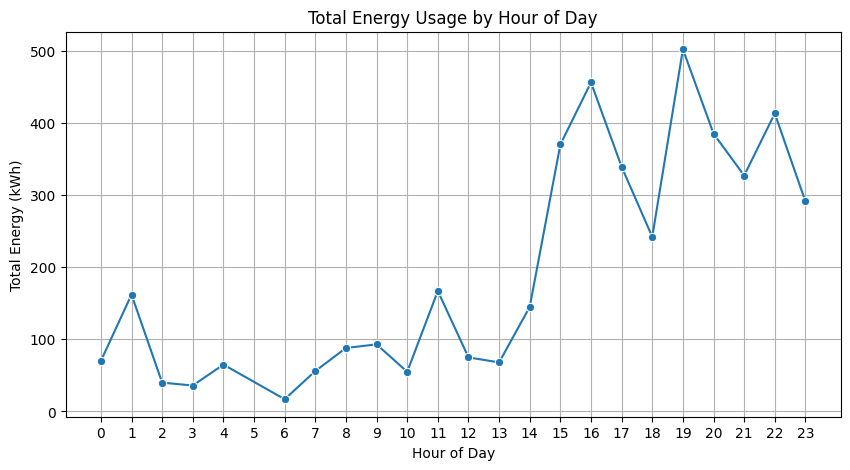

In [35]:
hourly_energy = df.groupby('hour')['energy_session'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_energy.index, y=hourly_energy.values, marker='o')
plt.title("Total Energy Usage by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Total Energy (kWh)")
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure all 24 hours shown
plt.show()


In [36]:
df['month'] = df['plugin_time'].dt.to_period('M')

monthly_energy = df.groupby('month')['energy_session'].sum().reset_index()
monthly_energy['month'] = monthly_energy['month'].dt.to_timestamp()  # For plotting


**TRAINING THE MODEL**

In [38]:
from prophet import Prophet

# Prophet needs 'ds' and 'y' columns
df_prophet = monthly_energy.rename(columns={"month": "ds", "energy_session": "y"})


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2m1c2eh/j5_gj26d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2m1c2eh/lbbgis5c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99119', 'data', 'file=/tmp/tmpa2m1c2eh/j5_gj26d.json', 'init=/tmp/tmpa2m1c2eh/lbbgis5c.json', 'output', 'file=/tmp/tmpa2m1c2eh/prophet_model73ps5y8h/prophet_model-20250726081155.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:11:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:11:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

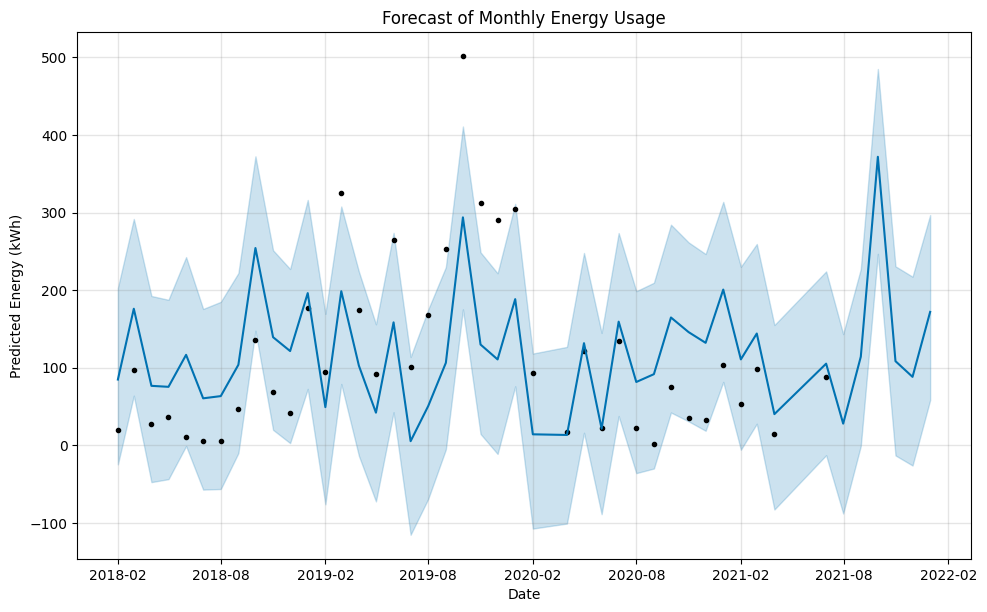

In [39]:
model = Prophet()
model.fit(df_prophet)

# Forecast next 6 months
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

# Plot
model.plot(forecast)
plt.title("Forecast of Monthly Energy Usage")
plt.xlabel("Date")
plt.ylabel("Predicted Energy (kWh)")
plt.grid(True)
plt.show()


In [41]:
# Step 1: Convert to datetime if not done
df['plugin_time'] = pd.to_datetime(df['plugin_time'])

# Step 2: Resample monthly energy usage
df_monthly = df.resample('M', on='plugin_time')['energy_session'].sum().reset_index()

# Step 3: Rename columns for Prophet
df_monthly.columns = ['ds', 'y']


/tmp/ipython-input-41-2959601748.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M', on='plugin_time')['energy_session'].sum().reset_index()


**PREDICTION OF VALUES**

In [42]:
# Merge actual and forecasted values on the date
merged_df = forecast.set_index('ds')[['yhat']].join(df_monthly.set_index('ds')[['y']]).dropna()

# Calculate MAE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(merged_df['y'], merged_df['yhat'])
rmse = np.sqrt(mean_squared_error(merged_df['y'], merged_df['yhat']))

print(f"Mean Absolute Error (MAE): {mae:.2f} kWh")
print(f"Root Mean Square Error (RMSE): {rmse:.2f} kWh")


Mean Absolute Error (MAE): 60.18 kWh
Root Mean Square Error (RMSE): 60.18 kWh


In [44]:
print("Forecast dates:", forecast['ds'].min(), "to", forecast['ds'].max())
print("Actual data dates:", df_monthly['ds'].min(), "to", df_monthly['ds'].max())


Forecast dates: 2018-02-01 00:00:00 to 2021-12-31 00:00:00
Actual data dates: 2018-02-28 00:00:00 to 2021-07-31 00:00:00


Mean Absolute Error (MAE): 77.88 kWh
Root Mean Square Error (RMSE): 91.27 kWh


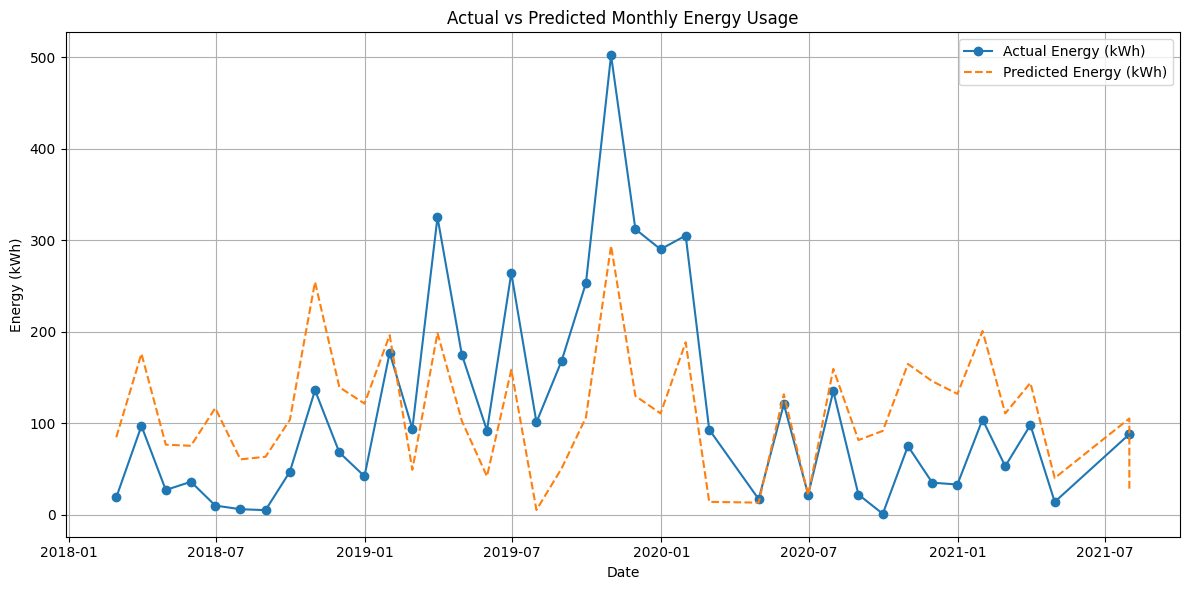

In [45]:
# Convert Prophet forecast 'ds' dates to end-of-month
forecast['ds'] = pd.to_datetime(forecast['ds']) + pd.offsets.MonthEnd(0)

# Now merge again
merged_df = forecast.set_index('ds')[['yhat']].join(df_monthly.set_index('ds')[['y']]).dropna()

# Evaluate again
mae = mean_absolute_error(merged_df['y'], merged_df['yhat'])
rmse = np.sqrt(mean_squared_error(merged_df['y'], merged_df['yhat']))
print(f"Mean Absolute Error (MAE): {mae:.2f} kWh")
print(f"Root Mean Square Error (RMSE): {rmse:.2f} kWh")

# Plot again
plt.figure(figsize=(12,6))
plt.plot(merged_df.index, merged_df['y'], label='Actual Energy (kWh)', marker='o')
plt.plot(merged_df.index, merged_df['yhat'], label='Predicted Energy (kWh)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Energy (kWh)')
plt.title('Actual vs Predicted Monthly Energy Usage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


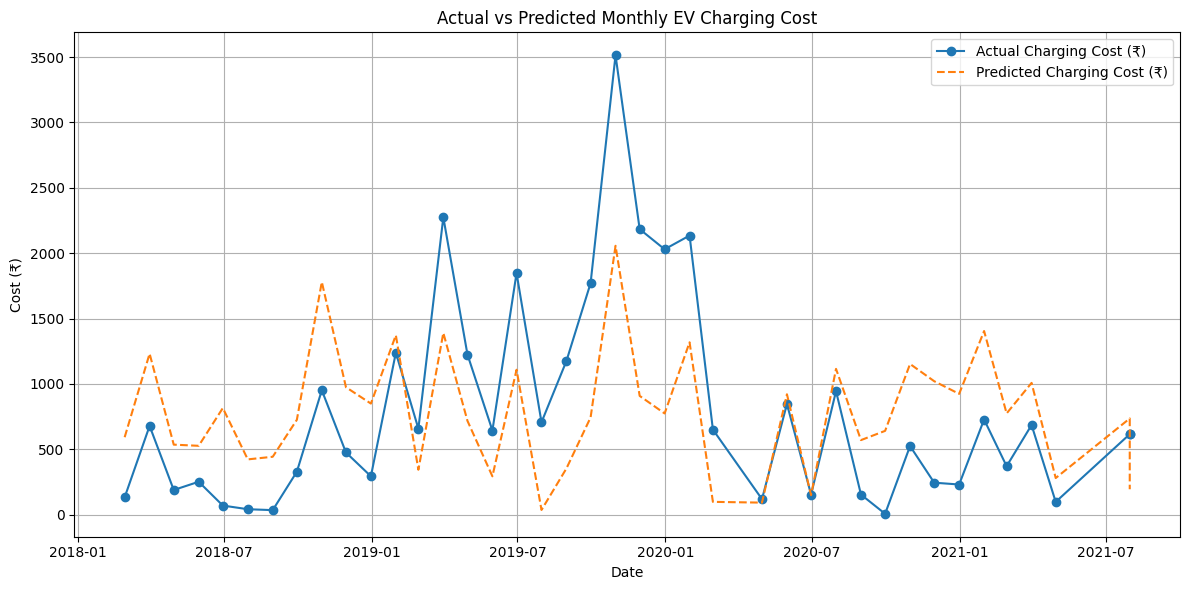

Average Actual Monthly Cost: ₹796.25
Average Predicted Monthly Cost: ₹785.16


In [46]:
# Step 10: Cost Estimation
cost_per_kwh = 7  # Change this based on country/region
merged_df['actual_cost'] = merged_df['y'] * cost_per_kwh
merged_df['predicted_cost'] = merged_df['yhat'] * cost_per_kwh

# Plot monthly cost comparison
plt.figure(figsize=(12,6))
plt.plot(merged_df.index, merged_df['actual_cost'], label='Actual Charging Cost (₹)', marker='o')
plt.plot(merged_df.index, merged_df['predicted_cost'], label='Predicted Charging Cost (₹)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Cost (₹)')
plt.title('Actual vs Predicted Monthly EV Charging Cost')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Average monthly cost over the period
print(f"Average Actual Monthly Cost: ₹{merged_df['actual_cost'].mean():.2f}")
print(f"Average Predicted Monthly Cost: ₹{merged_df['predicted_cost'].mean():.2f}")
